<strong><h1>Preâmbulo</h1></strong>

In [1]:
import Pkg
using Pkg
Pkg.add("StatsPlots")
Pkg.add("CSV")
Pkg.add("DataFrames")
using StatsPlots
using CSV
using DataFrames

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


<strong><h1>Mandelbrot - Sequencial</h1></strong>
Texto pode ser digitado aqui

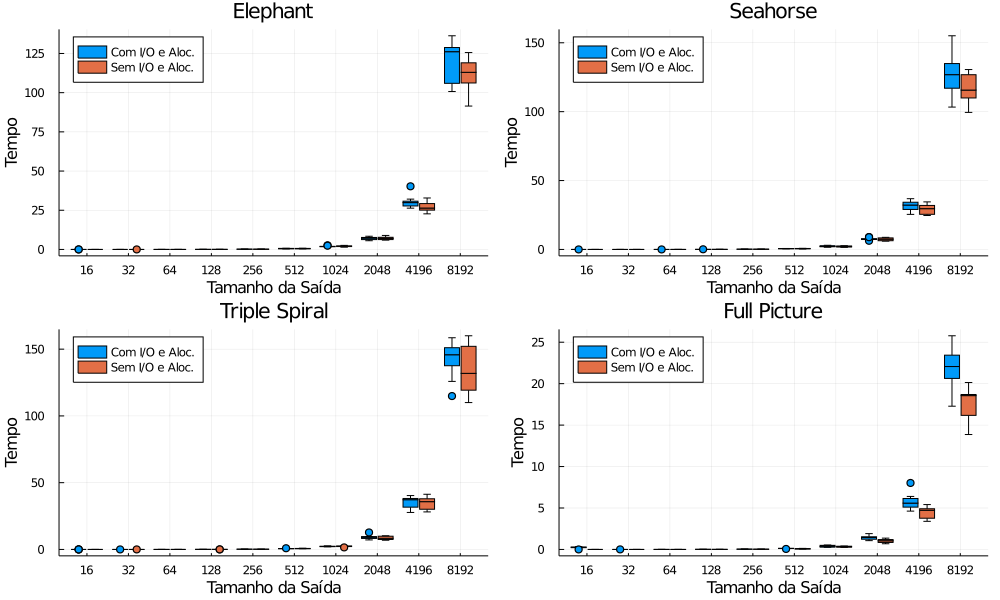

In [2]:
dataIoPaths = [ "../tests/seq/with-IO-Aloc/elephant.csv",
                "../tests/seq/with-IO-Aloc/seahorse.csv",
                "../tests/seq/with-IO-Aloc/triple_spiral.csv",
                "../tests/seq/with-IO-Aloc/full.csv"]
dataNoIoPaths = [ "../tests/seq/no-IO-Aloc/elephant.csv",
                "../tests/seq/no-IO-Aloc/seahorse.csv",
                "../tests/seq/no-IO-Aloc/triple_spiral.csv",
                "../tests/seq/no-IO-Aloc/full.csv"]
titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]

x = repeat(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"], outer=20)
p = []

for i in 1:4
    v = []
    w = []
    dataIO = CSV.read(dataIoPaths[i], DataFrame)
    dataNoIO = CSV.read(dataNoIoPaths[i], DataFrame)
    
    for row in eachrow(dataIO)
        v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end
    
    for row in eachrow(dataNoIO)
        w = [w;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end
    y = [v;vec(w)]

    push!(p, groupedboxplot(x, y, bar_width = 0.8,
                    group = repeat(["Com I/O e Aloc.", "Sem I/O e Aloc."], inner = 100),
                    xlabel = "Tamanho da Saída", ylabel="Tempo", legend=:topleft))
end
plot(p[1], p[2], p[3], p[4], title = titles, layout = (2,2))
plot!(size=(1000,600))

<strong><h1>Mandelbrot - Pthreads</h1></strong>
Texto pode ser digitado aqui

In [62]:
dataElephantPaths = [ "../tests/pth/elephant/elephant_1.csv",
                    "../tests/pth/elephant/elephant_2.csv",
                    "../tests/pth/elephant/elephant_4.csv",
                    "../tests/pth/elephant/elephant_8.csv",
                    "../tests/pth/elephant/elephant_16.csv",
                    "../tests/pth/elephant/elephant_32.csv"]

dataSeahorsePaths = [ "../tests/pth/seahorse/seahorse_1.csv",
                    "../tests/pth/seahorse/seahorse_2.csv",
                    "../tests/pth/seahorse/seahorse_4.csv",
                    "../tests/pth/seahorse/seahorse_8.csv",
                    "../tests/pth/seahorse/seahorse_16.csv",
                    "../tests/pth/seahorse/seahorse_32.csv"]

dataTSPaths = [ "../tests/pth/triple_spiral/triple_spiral_1.csv",
                "../tests/pth/triple_spiral/triple_spiral_2.csv",
                "../tests/pth/triple_spiral/triple_spiral_4.csv",
                "../tests/pth/triple_spiral/triple_spiral_8.csv",
                "../tests/pth/triple_spiral/triple_spiral_16.csv",
                "../tests/pth/triple_spiral/triple_spiral_32.csv"]

dataFullPaths = [ "../tests/pth/full/full_1.csv",
                "../tests/pth/full/full_2.csv",
                "../tests/pth/full/full_4.csv",
                "../tests/pth/full/full_8.csv",
                "../tests/pth/full/full_16.csv",
                "../tests/pth/full/full_32.csv"]

titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]

x = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"]
p = []



bElephant = []
bSeahorse = []
bTS = []
bFull = []
for i in 1:6
    t = []
    u = []
    v = []
    w = []
    dataElephant = CSV.read(dataElephantPaths[i], DataFrame)
    dataSeahorse = CSV.read(dataSeahorsePaths[i], DataFrame)
    dataTS = CSV.read(dataTSPaths[i], DataFrame)
    dataFull = CSV.read(dataFullPaths[i], DataFrame)

    for row in eachrow(dataElephant)
        t = [t;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end

    for row in eachrow(dataSeahorse)
        u = [u;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end

    for row in eachrow(dataTS)
        v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end

    for row in eachrow(dataFull)
        w = [w;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end

    
    bElephant = push!(bElephant, boxplot(x, t, xlabel="Tamanho da Saída", ylabel="Tempo", legend=:topleft))
    bSeahorse = push!(bSeahorse, boxplot(x, u, xlabel="Tamanho da Saída", ylabel="Tempo", legend=:topleft))
    bTS = push!(bTS, boxplot(x, v, xlabel="Tamanho da Saída", ylabel="Tempo", legend=:topleft))
    bFull = push!(bFull, boxplot(x, w, xlabel="Tamanho da Saída", ylabel="Tempo", legend=:topleft))
end

push!(p, bElephant[6])
push!(p, bSeahorse[6])
push!(p, bTS[6])
push!(p, bFull[6])

plot(p[1], p[2], p[3], p[4], title = titles, layout = (2,2))
plot!(size=(800,600))

GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT


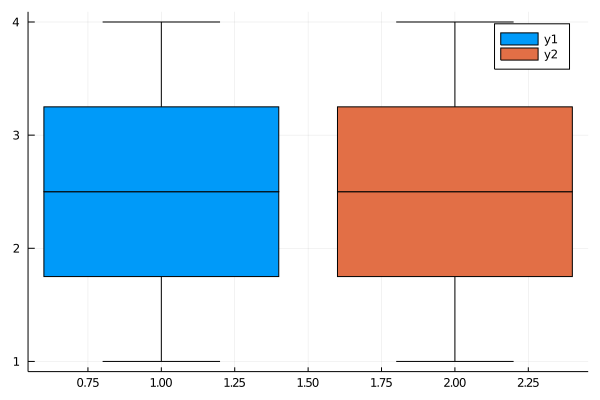

In [58]:
a = [1:8]
b = [1:4]

aux = []
aux = push!(aux, boxplot(a, b))
aux = push!(aux, boxplot!(a, b))

# plot(aux[2], layout=(1,1))
# plot!(size=(400,600))
plot(aux[2])

